# Event rate distribution over metallicity at z=0


In [21]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import cm
from hoki.constants import BPASS_NUM_METALLICITIES 

In [42]:
# Plotting settings
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.linewidth'] = 2

cmap = cm.get_cmap('tab10', 10)
colours = [cmap(0), cmap(1), cmap(3), cmap(4), cmap(5), cmap(6)]
SFH_names = ["millimillennium", "TNG","EAGLE","empirical"]

In [8]:
path = "../data/"

In [9]:
data = h5py.File(f"{path}/data.h5", "r")
event_rates = data['event_rates']

In [10]:
# The event rates from different SFH have the same redshift bins
redshift = event_rates.attrs['event_redshift'][:-1]

## Metallicity transformation

Transform the BPASS metallicity fractions into an oxygen fraction to allow for comparison with observations.

In [27]:
frac = [1e-5,0.0001, 0.001, 0.002, 0.003, 0.004, 0.006, 0.008, 0.010, 0.014, 0.020, 0.030, 0.040]
logOH = [6, 7, 8, 8.31, 8.43, 8.51, 8.61, 8.69, 8.75, 8.77, 8.93,9.05,9.13]
# values from Ashley et al (2020), extrapolated to zem5 with a straight line

def ZtoLog(Z):
    frac = [1e-5,0.0001, 0.001, 0.002, 0.003, 0.004, 0.006, 0.008, 0.010, 0.014, 0.020, 0.030, 0.040]
    logOH = [6, 7, 8, 8.31, 8.43, 8.51, 8.61, 8.69, 8.75, 8.77, 8.93,9.05,9.13]
    return np.interp(Z, frac, logOH)
    
def LogtoZ(Log):
    frac = [1e-5,0.0001, 0.001, 0.002, 0.003, 0.004, 0.006, 0.008, 0.010, 0.014, 0.020, 0.030, 0.040]
    logOH = [6, 7, 8, 8.31, 8.43, 8.51, 8.61, 8.69, 8.75, 8.77, 8.93,9.05,9.13]
    return np.interp(Log, logOH, frac)

## Calculate the number of CCSNe

In [43]:
CCSN = {}

CCSN["millimillennium"] =  event_rates['millimillennium']["II"][:,0]
CCSN["millimillennium"] += event_rates['millimillennium']["IIP"][:,0]
CCSN["millimillennium"] += event_rates['millimillennium']["Ib"][:,0]
CCSN["millimillennium"] += event_rates['millimillennium']["Ic"][:,0]
CCSN["TNG"] =  event_rates['TNG']["II"][:,0]
CCSN["TNG"] += event_rates['TNG']["IIP"][:,0]
CCSN["TNG"] += event_rates['TNG']["Ib"][:,0]
CCSN["TNG"] += event_rates['TNG']["Ic"][:,0]

CCSN["EAGLE"] =  event_rates['EAGLE']["II"][:,0]
CCSN["EAGLE"] += event_rates['EAGLE']["IIP"][:,0]
CCSN["EAGLE"] += event_rates['EAGLE']["Ib"][:,0]
CCSN["EAGLE"] += event_rates['EAGLE']["Ic"][:,0]

CCSN["empirical"] =  event_rates['empirical']["II"][:,0]
CCSN["empirical"] += event_rates['empirical']["IIP"][:,0]
CCSN["empirical"] += event_rates['empirical']["Ib"][:,0]
CCSN["empirical"] += event_rates['empirical']["Ic"][:,0]

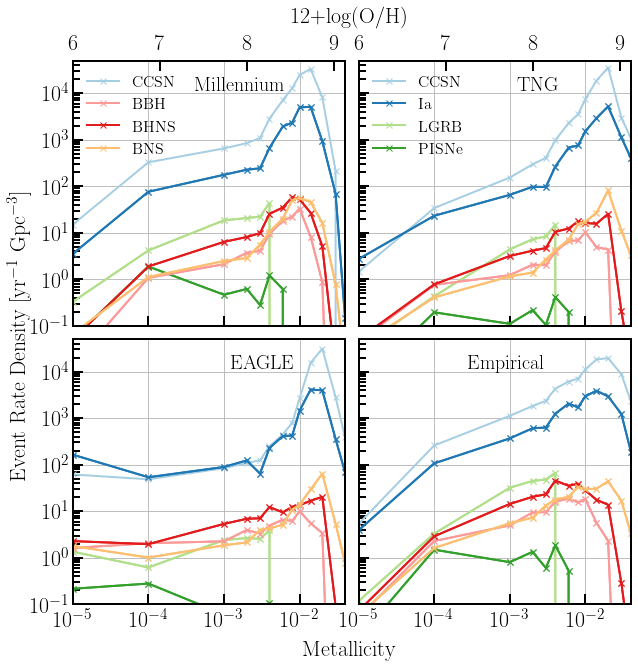

In [47]:
colors = ["#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99","#b15928"]
fig, axes = plt.subplots(2,2, figsize=(10,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
count = 0



for j in SFH_names:
    ax = axes[count //2, count % 2]
    ax.plot(BPASS_NUM_METALLICITIES, CCSN[j], label="CCSN", marker='x', color=colors[0], lw=2)    

    color_count = 1
    # order in which to plot the values
    for i in ["Ia", "LGRB", "PISNe", "BBH", "BHNS", "BNS"]:

        # Select axis based on column + 

        # Necessary to split up the legend between two figures
        if count % 2 == 0 and count // 2 == 0 and (i == "BBH" or i == "BHNS" or i == "BNS"):
            ax.plot(BPASS_NUM_METALLICITIES, event_rates[j][i][:,0], label=i, marker="x", color=colors[color_count], lw=2)

        else:
            ax.plot(BPASS_NUM_METALLICITIES, event_rates[j][i][:,0], marker="x", color=colors[color_count], lw=2)
            
        if count % 2 == 1 and count // 2 == 0 and not (i == "BBH" or i == "BHNS" or i == "BNS"):
            ax.plot(BPASS_NUM_METALLICITIES, event_rates[j][i][:,0], label=i, marker="x", color=colors[color_count], lw=2)
        else:
            ax.plot(BPASS_NUM_METALLICITIES, event_rates[j][i][:,0], marker="x", color=colors[color_count], lw=2)

        color_count += 1

    # Setup each axis individually; necessary to remove ticklabels on some
    ax.grid()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e-5,4e-2)
    ax.set_ylim(1e-1,5e4)
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', pad=7)
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
    ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=16))
    ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=16))
    if j == "empirical":
        ax.text(0.4, 0.89, "Empirical", transform=ax.transAxes, fontsize=20)
    elif j == "millimillennium":
        ax.text(0.45, 0.89, "Millennium", transform=ax.transAxes,fontsize=20)
    else:    
        ax.text(0.58,0.89, j, transform=ax.transAxes, fontsize=20)
       
    # Remove ticks from some axes
    if count % 2 != 0:
        ax.yaxis.set_ticklabels([])
    if count // 2 != 1:
        ax.xaxis.set_ticklabels([])
    count += 1
    

a = axes[0,0]
sec_ax = a.secondary_xaxis('top', functions = (ZtoLog, LogtoZ))
sec_ax.set_xscale('linear')
sec_ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', pad=7)


sec_ax = axes[0,1].secondary_xaxis('top', functions = (ZtoLog, LogtoZ))
sec_ax.set_xscale('linear')
sec_ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', pad=7)



# plot the legend
legend = axes[0,0].legend(ncol=1, frameon=False, fontsize=16)
legend = axes[0,1].legend(ncol=1, frameon=False, fontsize=16)

fig.text(0.51, 0.94, r'12+log(O/H)', ha='center', va='center')
fig.text(0.51, 0.06, r'Metallicity', ha='center', va='center')
fig.text(0.05, 0.5, 'Event Rate Density [yr$^{-1}$ Gpc$^{-3}$]', ha='center', va='center', rotation='vertical')  #  plt.show()
#plt.show()
plt.savefig("images/pdf/event_dist_over_metallicity.pdf")
plt.savefig("images/png/event_dist_over_metallicity.png", dpi=300)

In [49]:
data.close()